In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import pandas as pd
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = (15,7)

from numpy import *
from scipy.signal import decimate
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, pandas, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)
from scipy.io import wavfile
import IPython.display as ipd

from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_similarity_score

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
filename = 'Michael Jackson - Beat It.wav'
seed = 1

y, sr = librosa.load(filename) #load in file
ipd.Audio(y, rate = sr)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
#this cell with retrieve all the elements necessary to have a complete entry in the dataset

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
#print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

zcr = librosa.feature.zero_crossing_rate(y)
zcr_avg = numpy.average(zcr)
#print zcr_avg

cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent_avg = numpy.average(cent)
#print cent_avg

mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc_avg = numpy.average(mfcc)
#print mfcc_avg

S = numpy.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
contrast_avg = numpy.average(contrast)
#print contrast_avg

rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff_avg = numpy.average(rolloff)
#print rolloff_avg

bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
bandwidth_avg = numpy.average(bandwidth)
#print bandwidth_avg

rmse = librosa.feature.rmse(y=y)
rmse_avg  = numpy.average(rmse)
print rmse_avg

0.175407


In [4]:
# gets the line number entered song will be added on
countLine = 0
with open("all.txt") as f:
    for i, l in enumerate(f):
        countLine = i

countLine = countLine + 1
print 'countLine: ', countLine
songName = filename.split(".")[0] # gets songname to add

#creates the string that will be added to dataset
add = str(countLine) + ',' + filename + ',' + str(mfcc_avg) + "," + str(cent_avg) +"," + str(contrast_avg) +"," +str(rolloff_avg) +"," +str(bandwidth_avg) + "," + str(tempo) + ", " + str(rmse_avg)

checkValid = True
oursong = countLine - 2 #max line count - 1 to get the data line, -1 for index of features scaled.

#adds to dataset
with open("all.txt") as f:
    for i, l in enumerate(f):
        if l.split(",")[1] == filename:
            checkValid = False
            oursong = i - 1
            print l

with open("all.txt", "a") as myfile:
    if checkValid == True:
        myfile.write('\n' +add)

myfile.close()

#reads text file containing dataset
df = pd.read_csv('all.txt', header = None, low_memory=False)
x = numpy.asarray(df.loc[1:,3:4]) #x = numpy.asarray(df.loc[1:,3:6]) #gets the 1st 2 features

y = numpy.asarray(df.loc[1:,2:2])#recommandatons based on mfcc
labels = numpy.asarray(df.loc[:0,]) #label scem-sbwm

print labels
#print y
#print x
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (-1,1)) #scales dataset to make it easier to display on graph
features_scaled = min_max_scaler.fit_transform(x)

#print features_scaled
ours = features_scaled[oursong]
#print ours

countLine:  176
[['%id' 'name' 'mfcc' 'scem' 'scom' 'srom' 'sbwm' 'tempo' 'rmse']]


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


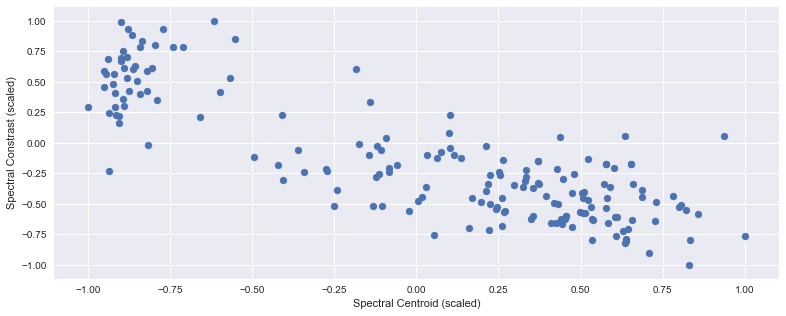

In [5]:
plt.scatter(features_scaled[:,0], features_scaled[:,1]) #1st plot without clustering
plt.xlabel('Spectral Centroid (scaled)')
plt.ylabel('Spectral Constrast (scaled)')

In [6]:
model = sklearn.cluster.KMeans(n_clusters =10, random_state=seed) #create model with specifications
labels = model.fit_predict(features_scaled) #fits dataset into model
print labels #shows the cluster number each song belongs to

[8 0 9 0 4 9 8 4 8 5 9 4 4 4 4 4 2 2 8 4 4 0 2 4 2 8 4 8 4 9 9 8 4 4 2 8 8
 2 4 8 0 8 2 8 4 8 0 9 0 6 6 6 1 1 1 6 1 1 6 1 6 6 6 6 6 6 6 1 6 6 6 1 7 6
 6 7 6 1 1 6 6 6 6 6 1 1 1 1 1 1 1 6 1 4 9 4 8 2 8 8 9 8 9 0 4 9 8 9 8 8 9
 2 8 2 9 8 9 2 9 4 8 4 2 0 2 2 2 8 8 5 5 5 2 3 9 5 3 5 5 9 5 2 5 3 3 1 3 0
 3 3 3 5 5 5 5 0 3 0 5 3 2 0 0 0 4 8 9 3 7 7 5 5 3 7 6 8]


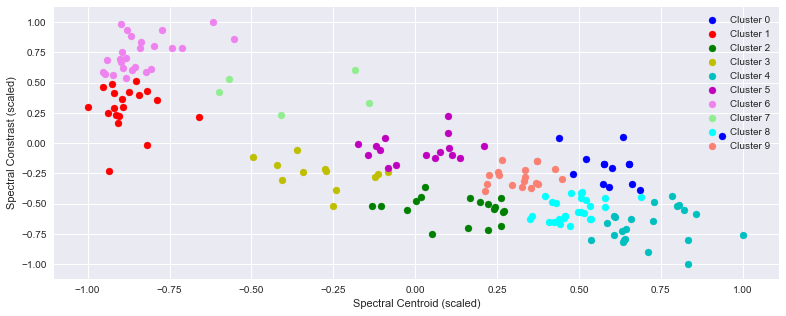

In [7]:
#creates cluster color graph now
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r')
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='g')
plt.scatter(features_scaled[labels==3,0], features_scaled[labels==3,1], c='y')
plt.scatter(features_scaled[labels==4,0], features_scaled[labels==4,1], c='c')
plt.scatter(features_scaled[labels==5,0], features_scaled[labels==5,1], c='m')
plt.scatter(features_scaled[labels==6,0], features_scaled[labels==6,1], c='violet')
plt.scatter(features_scaled[labels==7,0], features_scaled[labels==7,1], c='lightgreen')
plt.scatter(features_scaled[labels==8,0], features_scaled[labels==8,1], c='cyan')
plt.scatter(features_scaled[labels==9,0], features_scaled[labels==9,1], c='salmon')



plt.xlabel('Spectral Centroid (scaled)')
plt.ylabel('Spectral Constrast (scaled)')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
            'Cluster 7', 'Cluster 8', 'Cluster 9'))

[0, 6, 8, 18, 25, 27, 31, 35, 36, 39, 41, 43, 45, 96, 98, 99, 101, 106, 108, 109, 112, 115, 120, 127, 128, 165, 175]
["'Till I Collapse", 'Burnin', 'Champions', 'Hate Me Now', 'Mercy', 'Notorious Thugs - feat', 'POWER', 'Put On', 'Rap God', 'Tempo', 'Thunderstruck', 'Welcome To The Jungle', "'Till I Collapse", 'Blow Your Mind (Mwah)', 'Burn Brighter', 'Closer', 'CRZY', 'Hymn For The Weekend - Seeb Remix', 'Into You', 'Let Me Hold You (Turn Me On)', 'Millionaire (feat', 'Perfect Strangers', 'Starving', 'Whole Heart', 'WILD - Young Bombs Remix', 'So In Love - feat', 'Michael Jackson - Beat It']


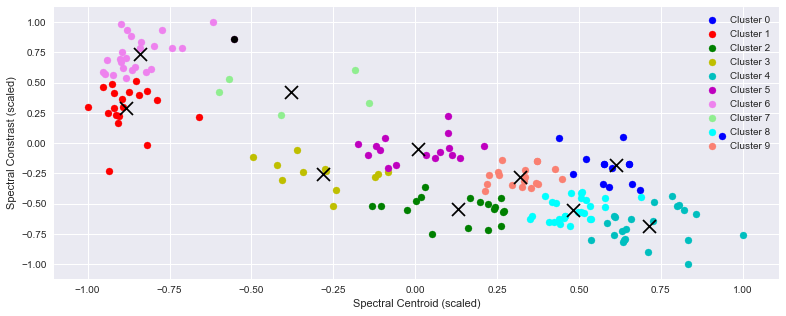

In [8]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r') #first 2 elements in here
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='g')
plt.scatter(features_scaled[labels==3,0], features_scaled[labels==3,1], c='y')
plt.scatter(features_scaled[labels==4,0], features_scaled[labels==4,1], c='c')
plt.scatter(features_scaled[labels==5,0], features_scaled[labels==5,1], c='m')
plt.scatter(features_scaled[labels==6,0], features_scaled[labels==6,1], c='violet')
plt.scatter(features_scaled[labels==7,0], features_scaled[labels==7,1], c='lightgreen')
plt.scatter(features_scaled[labels==8,0], features_scaled[labels==8,1], c='cyan')
plt.scatter(features_scaled[labels==9,0], features_scaled[labels==9,1], c='salmon')

#gets the entered song's position on graph and plots it with different color
for x in numpy.array(features_scaled):
    if(numpy.array_equal(x,ours) == True):
        plt.scatter(x[0], x[1], c='k')

#marks centroids of each cluster
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
        
plt.xlabel('Spectral Centroid (scaled)')
plt.ylabel('Spectral Constrast (scaled)')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
            'Cluster 7', 'Cluster 8', 'Cluster 9'))

km_labels = model.labels_
#print km_labels

#gets the songs in the same cluster as the entered song
index = [find[0] for find, value in numpy.ndenumerate(km_labels) if value==labels[len(labels)-1]]
l2 = [int(v) for v in index]
#print l2

print l2
#print model.labels_
iterHold=0 #line number in lines
npLocation = 0 #index in l2
titles = [] #holds titles 

#returns the titles of the similar songs
fileOpen = open('all.txt', "r")
lines = fileOpen.readlines()[1:]

for look in lines:
    if(l2[npLocation] == iterHold):
        splitting = look.split(",")
        titles.append(splitting[1].split(".")[0])
        npLocation = npLocation +1
        iterHold = iterHold +1
    else:
        iterHold = iterHold +1
titlesHold1 = titles;
print titles

NOW WITH SPECTRAL ROLLOFF AND BANDWIDTH

In [9]:
df = pd.read_csv('all.txt', header = None, low_memory=False)
x = numpy.asarray(df.loc[1:,5:6]) #x = numpy.asarray(df.loc[1:,3:6]) #use spectral centroid and rolloff

y = numpy.asarray(df.loc[1:,2:2])#recommandatons based on mfcc
labels = numpy.asarray(df.loc[:0,]) #label scem-sbwm

#print labels
#print y
#print x
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (-1,1)) #scales entries
features_scaled = min_max_scaler.fit_transform(x)

#print features_scaled
ours = features_scaled[oursong] #entered song

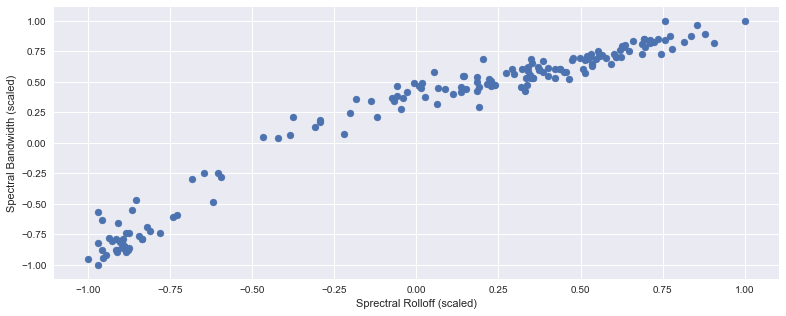

In [10]:
#graoh without clusters
plt.scatter(features_scaled[:,0], features_scaled[:,1])
plt.xlabel('Sprectral Rolloff (scaled)')
plt.ylabel('Spectral Bandwidth (scaled)')

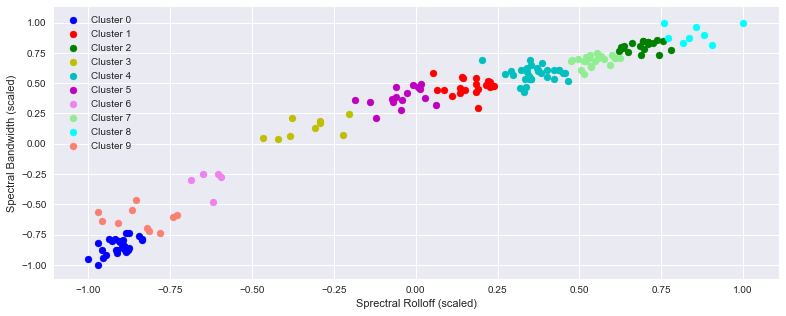

In [11]:
model = sklearn.cluster.KMeans(n_clusters =10, random_state=1) # creates model
labels = model.fit_predict(features_scaled) #fits entries to model

#plots data with cluster color
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r') #first 2 elements in here
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='g')
plt.scatter(features_scaled[labels==3,0], features_scaled[labels==3,1], c='y')
plt.scatter(features_scaled[labels==4,0], features_scaled[labels==4,1], c='c')
plt.scatter(features_scaled[labels==5,0], features_scaled[labels==5,1], c='m')
plt.scatter(features_scaled[labels==6,0], features_scaled[labels==6,1], c='violet')
plt.scatter(features_scaled[labels==7,0], features_scaled[labels==7,1], c='lightgreen')
plt.scatter(features_scaled[labels==8,0], features_scaled[labels==8,1], c='cyan')
plt.scatter(features_scaled[labels==9,0], features_scaled[labels==9,1], c='salmon')

plt.xlabel('Sprectral Rolloff (scaled)')
plt.ylabel('Spectral Bandwidth (scaled)')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
            'Cluster 7', 'Cluster 8', 'Cluster 9'))

[0, 2, 5, 18, 20, 22, 29, 31, 34, 36, 38, 39, 41, 43, 45, 47, 94, 97, 98, 101, 102, 105, 107, 110, 111, 113, 117, 118, 124, 126, 127, 147, 166, 175]
["'Till I Collapse", 'All The Way Up (Remix)', 'Blood On The Leaves', 'Hate Me Now', 'Last Resort', 'Look Alive - Remix', 'Panda', 'POWER', 'Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit)', 'Rap God', 'Smells Like Teen Spirit', 'Tempo', 'Thunderstruck', 'Welcome To The Jungle', "'Till I Collapse", 'All The Way Up (Remix)', 'Alarm', 'Body Say', 'Burn Brighter', 'CRZY', 'Dont Let Me Down', 'Heathens', 'In the Name of Love', 'Let Me Love You', 'Mama Said', 'My Way', 'Scars To Your Beautiful', 'Side To Side', 'This Is What You Came For', 'We Dont Talk Anymore (feat', 'Whole Heart', 'Have You Met Miss Jones', 'Spend The Night', 'Michael Jackson - Beat It']


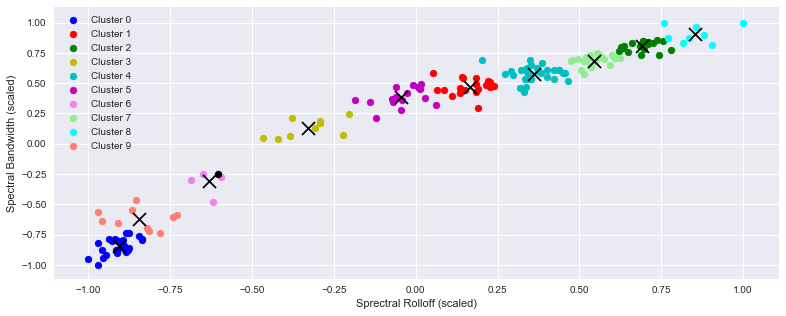

In [12]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r') #first 2 elements in here
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='g')
plt.scatter(features_scaled[labels==3,0], features_scaled[labels==3,1], c='y')
plt.scatter(features_scaled[labels==4,0], features_scaled[labels==4,1], c='c')
plt.scatter(features_scaled[labels==5,0], features_scaled[labels==5,1], c='m')
plt.scatter(features_scaled[labels==6,0], features_scaled[labels==6,1], c='violet')
plt.scatter(features_scaled[labels==7,0], features_scaled[labels==7,1], c='lightgreen')
plt.scatter(features_scaled[labels==8,0], features_scaled[labels==8,1], c='cyan')
plt.scatter(features_scaled[labels==9,0], features_scaled[labels==9,1], c='salmon')

#places clusters' cnetroid on graph
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

#changes color of entered song to black to view easier
for x in numpy.array(features_scaled):
    if(numpy.array_equal(x,ours) == True):
        plt.scatter(x[0], x[1], c='k')


plt.xlabel('Sprectral Rolloff (scaled)')
plt.ylabel('Spectral Bandwidth (scaled)')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
            'Cluster 7', 'Cluster 8', 'Cluster 9'))

#gets similar song's numbers
km_labels = model.labels_
#print km_labels
l2=[]
index = [find[0] for find, value in numpy.ndenumerate(km_labels) if value==labels[len(labels)-1]]
l2 = [int(v) for v in index]
print l2

#gets the title of the similar songs
#print l2
#print model.labels_
iterHold=0 #line number in lines
npLocation = 0 #index in l2
titles = [] #holds titles 

fileOpen = open('all.txt', "r")
lines = fileOpen.readlines()[1:]

for look in lines:
    if(l2[npLocation] == iterHold):
        splitting = look.split(",")
        titles.append(splitting[1].split(".")[0])
        npLocation = npLocation +1
        iterHold = iterHold +1
    else:
        iterHold = iterHold +1
titlesHold2 = titles
print titles

# NOW WITH TEMPO AND RMSE

In [13]:
df = pd.read_csv('all.txt', header = None, low_memory=False)
x = numpy.asarray(df.loc[1:,7:8]) #x = numpy.asarray(df.loc[1:,3:6]) #use spectral centroid and rolloff

y = numpy.asarray(df.loc[1:,2:2])#recommandatons based on mfcc
labels = numpy.asarray(df.loc[:0,]) #label scem-sbwm

#print labels
#print y
#print x
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (-1,1)) #scales entries
features_scaled = min_max_scaler.fit_transform(x)

#print features_scaled
ours = features_scaled[174] #entered song

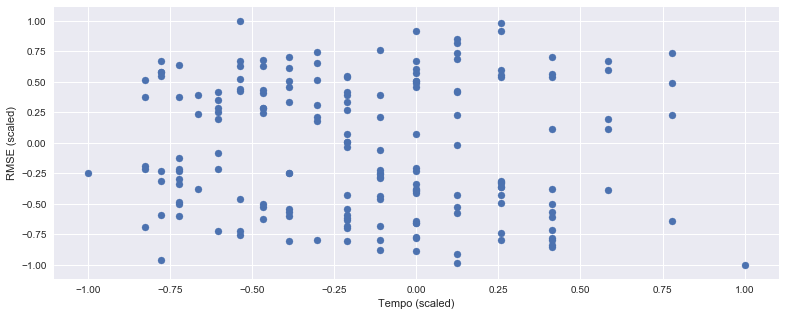

In [14]:
plt.scatter(features_scaled[:,0], features_scaled[:,1])
plt.xlabel('Tempo (scaled)')
plt.ylabel('RMSE (scaled)')

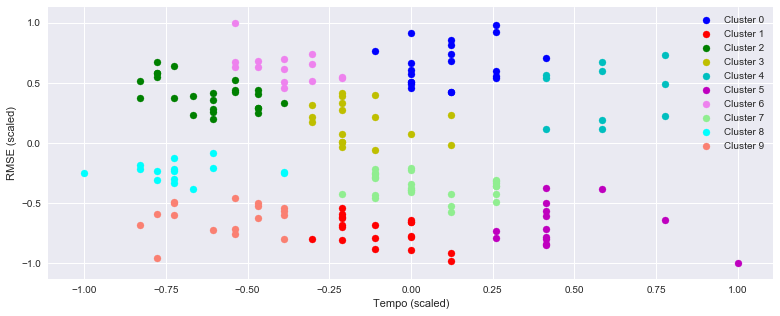

In [15]:
model = sklearn.cluster.KMeans(n_clusters =10, random_state=1) # creates model
labels = model.fit_predict(features_scaled) #fits entries to model

#plots data with cluster color
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r') #first 2 elements in here
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='g')
plt.scatter(features_scaled[labels==3,0], features_scaled[labels==3,1], c='y')
plt.scatter(features_scaled[labels==4,0], features_scaled[labels==4,1], c='c')
plt.scatter(features_scaled[labels==5,0], features_scaled[labels==5,1], c='m')
plt.scatter(features_scaled[labels==6,0], features_scaled[labels==6,1], c='violet')
plt.scatter(features_scaled[labels==7,0], features_scaled[labels==7,1], c='lightgreen')
plt.scatter(features_scaled[labels==8,0], features_scaled[labels==8,1], c='cyan')
plt.scatter(features_scaled[labels==9,0], features_scaled[labels==9,1], c='salmon')

plt.xlabel('Tempo (scaled)')
plt.ylabel('RMSE (scaled)')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
            'Cluster 7', 'Cluster 8', 'Cluster 9'))

[49, 52, 62, 66, 67, 68, 69, 72, 73, 74, 86, 88, 89, 142, 146, 147, 158, 169, 175]
['A Game of Badminton', 'Cascade', 'For Stormboy', "India's Lament", 'Interlude For Piano', 'Intro', 'La Clairi\xc3\xa8re', 'Light of the Seven', 'Mrs', 'Nocturne in a Minor', 'The Departure', 'Threnody', 'Throes', 'Cantaloupe Island', 'Ham Hocks and Cabbage', 'Have You Met Miss Jones', 'New Orleans', 'Stolen Moments', 'Michael Jackson - Beat It']


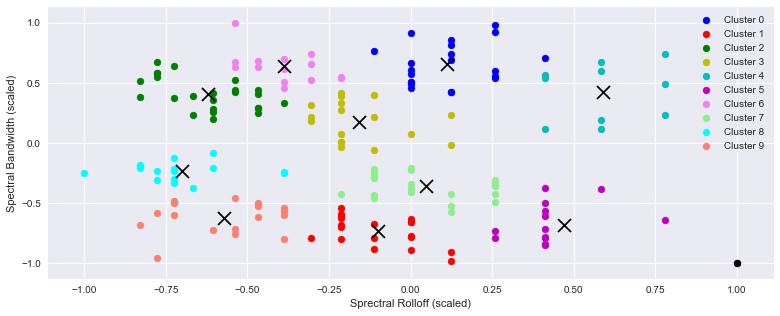

In [16]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r') #first 2 elements in here
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='g')
plt.scatter(features_scaled[labels==3,0], features_scaled[labels==3,1], c='y')
plt.scatter(features_scaled[labels==4,0], features_scaled[labels==4,1], c='c')
plt.scatter(features_scaled[labels==5,0], features_scaled[labels==5,1], c='m')
plt.scatter(features_scaled[labels==6,0], features_scaled[labels==6,1], c='violet')
plt.scatter(features_scaled[labels==7,0], features_scaled[labels==7,1], c='lightgreen')
plt.scatter(features_scaled[labels==8,0], features_scaled[labels==8,1], c='cyan')
plt.scatter(features_scaled[labels==9,0], features_scaled[labels==9,1], c='salmon')

#places clusters' cnetroid on graph
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

#changes color of entered song to black to view easier
for x in numpy.array(features_scaled):
    if(numpy.array_equal(x,ours) == True):
        plt.scatter(x[0], x[1], c='k')


plt.xlabel('Sprectral Rolloff (scaled)')
plt.ylabel('Spectral Bandwidth (scaled)')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
            'Cluster 7', 'Cluster 8', 'Cluster 9'))

#gets similar song's numbers
km_labels = model.labels_
#print km_labels
l2=[]
index = [find[0] for find, value in numpy.ndenumerate(km_labels) if value==labels[len(labels)-1]]
l2 = [int(v) for v in index]
print l2

#gets the title of the similar songs
#print l2
#print model.labels_
iterHold=0 #line number in lines
npLocation = 0 #index in l2
titles = [] #holds titles 

fileOpen = open('all.txt', "r")
lines = fileOpen.readlines()[1:]

for look in lines:
    if(l2[npLocation] == iterHold):
        splitting = look.split(",")
        titles.append(splitting[1].split(".")[0])
        npLocation = npLocation +1
        iterHold = iterHold +1
    else:
        iterHold = iterHold +1
titlesHold3 = titles
print titles

In [17]:
#prints out similar song set from both executions
print 'Spectral Centroid / Spectral Contrast'
for i in set(titlesHold1):
    print i

print '\nSpectral Rolloff / Spectral Bandwidth'
for j in set(titlesHold2):
    print j
    
print '\nTempo / RMSE'
for j in set(titlesHold3):
    print j

Spectral Centroid / Spectral Contrast
Closer
Burnin
Let Me Hold You (Turn Me On)
Hate Me Now
Whole Heart
Perfect Strangers
Put On
So In Love - feat
Starving
POWER
Thunderstruck
Notorious Thugs - feat
Tempo
Michael Jackson - Beat It
Into You
Millionaire (feat
CRZY
Champions
WILD - Young Bombs Remix
Mercy
Welcome To The Jungle
Rap God
Burn Brighter
Blow Your Mind (Mwah)
'Till I Collapse
Hymn For The Weekend - Seeb Remix

Spectral Rolloff / Spectral Bandwidth
Blood On The Leaves
This Is What You Came For
Side To Side
Let Me Love You
Welcome To The Jungle
Hate Me Now
Whole Heart
Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit)
My Way
POWER
Thunderstruck
Tempo
Look Alive - Remix
Michael Jackson - Beat It
Last Resort
Mama Said
Dont Let Me Down
Spend The Night
Alarm
All The Way Up (Remix)
Scars To Your Beautiful
Have You Met Miss Jones
Rap God
Smells Like Teen Spirit
Burn Brighter
Heathens
CRZY
Panda
'Till I Collapse
In the Name of Love
Body Say
We Dont Talk Anymore (feat

Tempo / 

In [18]:
#gets similar songs to show user that despite using different values from same songs, can still get similar recommandations
#for i in set(titlesHold1).intersection(set(titlesHold2).intersection(set(titlesHold3))):
for i in set(titlesHold1).intersection(set(titlesHold2)):
    print i

Rap God
Burn Brighter
POWER
Thunderstruck
Welcome To The Jungle
Tempo
Michael Jackson - Beat It
'Till I Collapse
Hate Me Now
Whole Heart
CRZY
